## 21D008 Probabilistic Inference - Project: Elliptical Slice Sampling in Classification

In [16]:
from scipy.stats import multivariate_normal
from EllipticalSliceSampler import EllipticalSampler
from utils import (
    plot_sampler,
    plot_multiple
)

import sys
import numpy as np
from numpy.random import multivariate_normal as mn
import matplotlib.pyplot as plt

In [56]:
prior_µ = np.array([1,2])
prior_Σ = np.array(
    [[ 2.58319407, -0.67001488],
    [-0.67001488,  1.09846023]]
)

lik_µ = np.array([0,0])
lik_Σ = np.array(
    [[ 1.80406008, -1.01247719],
    [-1.01247719,  1.34016259]]
)
loglik = lambda f: np.log(multivariate_normal.pdf(f, mean=lik_µ, cov=lik_Σ))
f_incumbent = mn(prior_µ - prior_µ, prior_Σ, size=1).squeeze()

nu = mn(prior_µ - prior_µ, prior_Σ, size=1)
log_y = loglik(f_incumbent) + np.log(np.random.uniform(0,1))
Θ = np.random.uniform(0 + sys.float_info.min, 2*np.pi)
print(Θ)
Θ_min, Θ_max = Θ - 2*np.pi, Θ

5.186880156345339


C:\Users\David\AppData\Local\Temp\ipykernel_4444\1869016765.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  f_incumbent = mn(prior_µ - prior_µ, prior_Σ, size=1).squeeze()
C:\Users\David\AppData\Local\Temp\ipykernel_4444\1869016765.py:15: RuntimeWarning: covariance is not positive-semidefinite.
  nu = mn(prior_µ - prior_µ, prior_Σ, size=1)


In [15]:
Θ_space = np.linspace(0,2*np.pi,100)

In [50]:
pointy = np.stack([(f_incumbent * np.cos(x) + nu * np.sin(x)).squeeze() for x in Θ_space])

In [54]:
f_incumbent

array([1.34092279, 0.04430346])

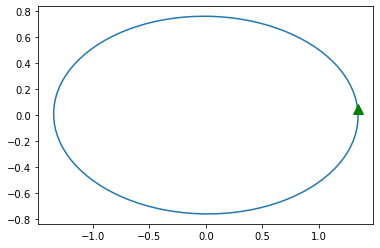

In [55]:
plt.plot(pointy[:,0], pointy[:,1])
plt.plot(f_incumbent[0], f_incumbent[1], 'g^', markersize=10, label='f')

In [49]:
np.stack(pointy)

array([[ 1.34092279,  0.04430346],
       [ 1.34419815, -0.00376615],
       [ 1.34206091, -0.05182059],
       [ 1.33451966, -0.09966636],
       [ 1.32160477, -0.14711082],
       [ 1.30336824, -0.19396291],
       [ 1.27988351, -0.24003399],
       [ 1.25124514, -0.28513853],
       [ 1.21756845, -0.32909492],
       [ 1.17898904, -0.37172616],
       [ 1.13566226, -0.41286058],
       [ 1.08776256, -0.45233257],
       [ 1.03548283, -0.48998317],
       [ 0.97903358, -0.52566078],
       [ 0.9186421 , -0.55922175],
       [ 0.85455158, -0.59053092],
       [ 0.78702007, -0.61946223],
       [ 0.71631952, -0.64589919],
       [ 0.6427346 , -0.66973534],
       [ 0.56656161, -0.6908747 ],
       [ 0.48810729, -0.70923216],
       [ 0.40768752, -0.72473378],
       [ 0.32562614, -0.73731716],
       [ 0.24225358, -0.74693163],
       [ 0.15790555, -0.75353846],
       [ 0.07292169, -0.75711106],
       [-0.0123558 , -0.75763504],
       [-0.09758353, -0.75510829],
       [-0.18241834,